In [10]:
#this is code to reshape .m4b or 4D matrix files to 2D file types
#this is a reshape operation, not a compression/data loss. All remain float32
#dimensional context is lost. 
    #Prior we may have had (x,y,w,z)
        #(Detector A energy, Detector B energy, Coincidence time, Count index)
    #Now we have (x,y) 
        #(Detector A energy, Detector B energy) and the cell value is coincidence count
    #Imagine a flattening of a rubix cube. The colors remain but the context does not.
#within terminal, open to your file then open jupyter notebook and run this.
    #cd Home/DataMine/test 
    #jupyter notebook 

In [2]:
import numpy as np
import os

filename = "Eu152Pb.m4b"

#file size in bytes
file_size = os.path.getsize(filename)
print(f"File size: {file_size} bytes")

#number of float32 values
num_values = file_size // 4
print(f"Number of float32 values (float32 = 4 bytes): {num_values}")

data = np.fromfile(filename, dtype=np.float32)

print("First 10 values:", data[:10])


File size: 67108864 bytes
Number of float32 values (float32 = 4 bytes): 16777216
First 10 values: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [11]:
#if data has 10000 values, and you guess the shape (10, 10, 10, 10)
#make sure [product of shape] = num_values

#here numvalues = 16777216

shape_4d = (64, 64, 64, 64)
#example valid options:
   #(64, 64, 64, 64) → 64⁴ = 16,777,216
   #(128, 128, 128, 8) → 128×128×128×8 = 16,777,216 
   #(256, 256, 256, 1) → large cube 

assert np.prod(shape_4d) == data.size, "Invalid shape!"

# Reshape
array_4d = data.reshape(shape_4d)
print("Reshaped to 4D:", array_4d.shape)


Reshaped to 4D: (64, 64, 64, 64)


In [12]:
#flatten to 2D
array_2d = array_4d.reshape(-1, array_4d.shape[-1])
print("2D shape:", array_2d.shape)
print(array_2d[:5])


2D shape: (262144, 64)
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0

In [13]:
#Save as a csv file
np.savetxt("Eu152Pb_2D.csv", array_2d, delimiter=",")

In [14]:
#print(f"Total float32 values: {data.size}")

In [17]:
import numpy as np

file_path = "/Users/roundsace/DataMine/test/Eu152Pb.m4b"
#/Users/roundsace/Home/DataMine/test/Eu152Pb.m4b"

# Load raw bytes
with open(file_path, "rb") as f:
    raw = f.read()

print(f"Total bytes: {len(raw)}")

# Try as uint16
data_uint16 = np.frombuffer(raw, dtype=np.uint16)
print(f"uint16 length: {data_uint16.size}, max: {data_uint16.max()}, min: {data_uint16.min()}")

# Try as int32
data_int32 = np.frombuffer(raw, dtype=np.int32)
print(f"int32 length: {data_int32.size}, max: {data_int32.max()}, min: {data_int32.min()}")

# Try as float32 (just for comparison)
data_float32 = np.frombuffer(raw, dtype=np.float32)
print(f"float32 length: {data_float32.size}, max: {data_float32.max()}, min: {data_float32.min()}")


Total bytes: 67108864
uint16 length: 33554432, max: 32796, min: 0
int32 length: 16777216, max: 32796, min: 0
float32 length: 16777216, max: 4.59569844359967e-41, min: 0.0


In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Load and interpret as uint16
file_path = "/Users/roundsace/DataMine/test/Eu152Pb.m4b"
data = np.fromfile(file_path, dtype=np.uint16)

# Reshape into 4D matrix: (64, 64, 64, 64)
cube_4d = data.reshape((64, 64, 64, 64))

# Collapse to 2D matrix by summing over two axes (e.g., time or detector slices)
coinc_matrix = np.sum(cube_4d, axis=(0, 2))  # shape: (64, 64)

# Plot
plt.figure(figsize=(6, 5))
plt.imshow(coinc_matrix, cmap='viridis', origin='lower', interpolation='none', vmin=1)
plt.colorbar(label="Counts")
plt.title("Gamma–Gamma Coincidence Matrix (Summed)")
plt.xlabel("Energy Channel 1")
plt.ylabel("Energy Channel 2")
plt.tight_layout()
plt.show()


ValueError: cannot reshape array of size 33554432 into shape (64,64,64,64)

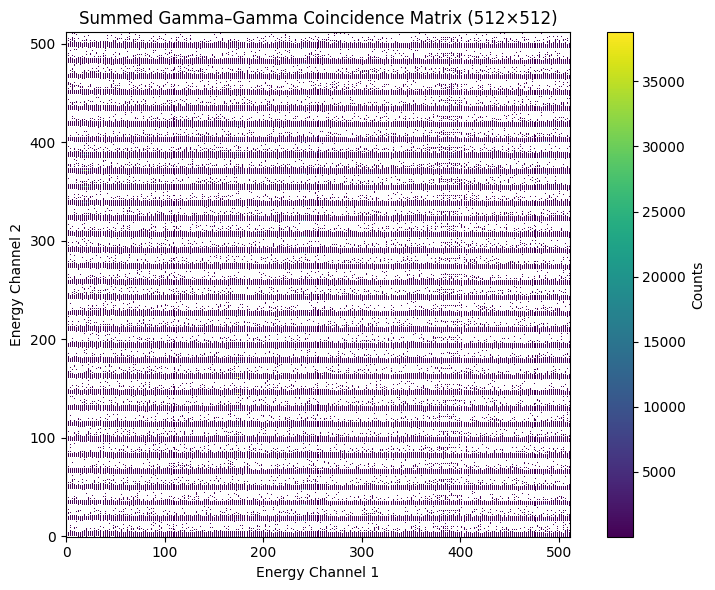

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Load binary file as uint16
file_path = "/Users/roundsace/DataMine/test/Eu152Pb.m4b"
data = np.fromfile(file_path, dtype=np.uint16)

# Reshape as (128 slices of 512x512)
cube = data.reshape((128, 512, 512))  # shape: (128, 512, 512)

# Sum over slices to get 2D coincidence matrix
coinc_matrix = np.sum(cube, axis=0)  # shape: (512, 512)

# Plot with white background for zeros
cmap = plt.cm.viridis.copy()
cmap.set_under('white')

plt.figure(figsize=(8, 6))
plt.imshow(coinc_matrix, cmap=cmap, origin='lower', interpolation='none', vmin=1)
plt.colorbar(label="Counts")
plt.title("Summed Gamma–Gamma Coincidence Matrix (512×512)")
plt.xlabel("Energy Channel 1")
plt.ylabel("Energy Channel 2")
plt.tight_layout()
plt.show()


NameError: name 'matrix_2d' is not defined

In [21]:
whos

Variable       Type              Data/Info
------------------------------------------
array_2d       ndarray           262144x64: 16777216 elems, type `float32`, 67108864 bytes (64.0 Mb)
array_4d       ndarray           64x64x64x64: 16777216 elems, type `float32`, 67108864 bytes (64.0 Mb)
cmap           ListedColormap    <matplotlib.colors.Listed<...>ap object at 0x108113d10>
coinc_matrix   ndarray           512x512: 262144 elems, type `uint64`, 2097152 bytes (2.0 Mb)
cube           ndarray           128x512x512: 33554432 elems, type `uint16`, 67108864 bytes (64.0 Mb)
data           ndarray           33554432: 33554432 elems, type `uint16`, 67108864 bytes (64.0 Mb)
data_float32   ndarray           16777216: 16777216 elems, type `float32`, 67108864 bytes (64.0 Mb)
data_int32     ndarray           16777216: 16777216 elems, type `int32`, 67108864 bytes (64.0 Mb)
data_uint16    ndarray           33554432: 33554432 elems, type `uint16`, 67108864 bytes (64.0 Mb)
f              BufferedReader

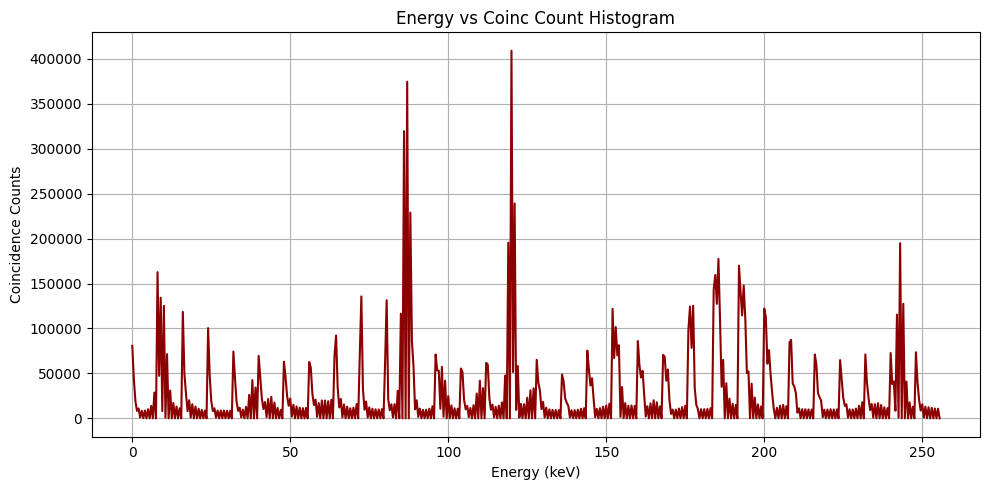

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# === Use your existing 2D matrix ===
# Assuming it's called matrix_2d and has shape (512, 512)
# If not, use: matrix_2d = np.load("your_matrix.npy")

# === Step 1: Define calibration ===
# Simple linear example: energy_keV = 0.5 × channel (you can replace this)
channel = np.arange(512)
energy_keV = 0.5 * channel  # Modify with your calibration!

# === Step 2: Sum coincidence counts ===
# Sum each row and each column to get total contribution per energy channel
counts = coinc_matrix.sum(axis=0) + coinc_matrix.sum(axis=1)

# === Step 3: Plot ===
plt.figure(figsize=(10, 5))
plt.plot(energy_keV, counts, color='darkred')
plt.title("Energy vs Coinc Count Histogram")
plt.xlabel("Energy (keV)")
plt.ylabel("Coincidence Counts")
plt.grid(True)
plt.tight_layout()
plt.show()
